# 6.4 Task Machine Learning Part 1
# Project: Data for safer Cities

## Content

1. **Importing Libraries**
2. **Importing Data Sets**
3. **Data Cleaning**  
4. **Data Preperation for Regression Analysis**  
5. **Regression Analysis**
6. **Saving the Datframe for further Use**

## 1. Importing Libraries

In [1]:
# Installing scikit-learn
!pip install scikit-learn

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Importing Data Sets

In [3]:
# Creating Shortcut
path = r'/home/justem/CF - Data Analyst/Achievement 6/2025-06-07 Data for safer Cities'

In [4]:
# Importing Dataset Clean
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [5]:
df.head()

,object_id,district_code,year,month,hour,weekday,accident_category,kind_of_accident,type_of_accident,light_conditions_code,...,season,bike_and_car,is_multiple_vehicle,num_vehicle_types_involved,longitude,latitude,lat_grid,lon_grid,location_density_score,distance_to_central_point_km
0,112695,2,2018,1,15,4,3,6,4,0,...,Winter,False,True,2,13.475015,52.513590,52.514,13.475,10,4.283476
1,112705,12,2018,1,11,2,3,2,6,0,...,Winter,False,False,1,13.291013,52.587254,52.587,13.291,4,11.002241
2,112726,2,2018,1,9,3,3,6,4,0,...,Winter,False,True,2,13.420564,52.526014,52.526,13.421,4,0.676377
3,112737,7,2018,1,17,2,3,6,7,2,...,Winter,False,True,2,13.348280,52.481841,52.482,13.348,26,6.257099
4,112747,3,2018,1,15,4,3,6,7,1,...,Winter,False,True,2,13.403222,52.583469,52.583,13.403,1,6.879364


In [6]:
df.shape

(50110, 39)

### Changing the Data frame to have it fit for the Regression Analysis

In [7]:
# Creating Variable Accident Scenario
def make_scenario(row):
    b, c, p = row['bike_inv'], row['car_inv'], row['pedestrian_inv']
    if b and c and not p: return 'bike_car'
    if p and c and not b: return 'ped_car'
    if b and p and c: return 'bike_ped_car'
    if b and p and not c: return 'bike_ped'
    if b and not c and not p: return 'bike_only'
    if p and not c and not b: return 'ped_only'
    if c and not b and not p: return 'car_only'
    return 'other'

In [8]:
# Applying to df
df['accident_scenario'] = df.apply(make_scenario, axis=1)

In [9]:
df.head()

,object_id,district_code,year,month,hour,weekday,accident_category,kind_of_accident,type_of_accident,light_conditions_code,...,bike_and_car,is_multiple_vehicle,num_vehicle_types_involved,longitude,latitude,lat_grid,lon_grid,location_density_score,distance_to_central_point_km,accident_scenario
0,112695,2,2018,1,15,4,3,6,4,0,...,False,True,2,13.475015,52.513590,52.514,13.475,10,4.283476,ped_car
1,112705,12,2018,1,11,2,3,2,6,0,...,False,False,1,13.291013,52.587254,52.587,13.291,4,11.002241,car_only
2,112726,2,2018,1,9,3,3,6,4,0,...,False,True,2,13.420564,52.526014,52.526,13.421,4,0.676377,ped_car
3,112737,7,2018,1,17,2,3,6,7,2,...,False,True,2,13.348280,52.481841,52.482,13.348,26,6.257099,ped_car
4,112747,3,2018,1,15,4,3,6,7,1,...,False,True,2,13.403222,52.583469,52.583,13.403,1,6.879364,bike_ped


In [10]:
# Checking Results 
df['accident_scenario'].value_counts(dropna = False) 

accident_scenario
car_only        22482
bike_car        13356
bike_only        4960
ped_car          4584
other            2426
bike_ped         1190
ped_only         1062
bike_ped_car       50
Name: count, dtype: int64

In [11]:
# Grouping Colums
group_cols = [
    'year', 'month', 'hour', 'weekday',
    'accident_category',   
    'accident_scenario'
]

In [12]:
# Group and Count
accidents_grouped = (
    df.groupby(group_cols)
      .size()
      .reset_index(name='number_of_accidents')
)

In [13]:
# Checking if enough Rows
accidents_grouped.shape
accidents_grouped['number_of_accidents'].describe()
accidents_grouped['number_of_accidents'].value_counts().head(20)

number_of_accidents
1     14641
2      4466
3      2188
4      1349
5       884
6       506
7       365
8       229
9       110
10       87
11       36
12       18
13       10
14        5
15        2
16        2
Name: count, dtype: int64

In [14]:
accidents_grouped.head()

,year,month,hour,weekday,accident_category,accident_scenario,number_of_accidents
0,2018,1,0,1,2,car_only,1
1,2018,1,0,2,2,ped_only,2
2,2018,1,0,2,3,ped_car,2
3,2018,1,0,7,2,ped_car,1
4,2018,1,1,1,2,car_only,1


In [15]:
accidents_grouped.info

<bound method DataFrame.info of        year  month  hour  weekday  accident_category accident_scenario  \
0      2018      1     0        1                  2          car_only   
1      2018      1     0        2                  2          ped_only   
2      2018      1     0        2                  3           ped_car   
3      2018      1     0        7                  2           ped_car   
4      2018      1     1        1                  2          car_only   
...     ...    ...   ...      ...                ...               ...   
24893  2021     12    23        4                  3          bike_car   
24894  2021     12    23        4                  3           ped_car   
24895  2021     12    23        5                  3          car_only   
24896  2021     12    23        7                  3          car_only   
24897  2021     12    23        7                  3          ped_only   

       number_of_accidents  
0                        1  
1                    

#### Numbers are too low so we need to make the df more corse

In [16]:
# New grouping without 'hour'
group_cols_coarse = [
    'year', 'month', 'weekday', 
    'accident_category', 'accident_scenario'
]

accidents_grouped_coarse = (
    df.groupby(group_cols_coarse)
      .size()
      .reset_index(name='number_of_accidents')
)

# Checking the shape and basic stats
print("Shape:", accidents_grouped_coarse.shape)
print(accidents_grouped_coarse['number_of_accidents'].describe())

# Checking top frequency counts
print(accidents_grouped_coarse['number_of_accidents'].value_counts().head(20))

Shape: (4214, 6)
count    4214.000000
mean       11.891315
std        18.193726
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       119.000000
Name: number_of_accidents, dtype: float64
number_of_accidents
1     810
2     497
3     421
4     353
5     259
6     210
7     183
8     151
9     125
10    117
11     70
12     65
13     61
14     52
16     42
15     38
17     30
20     23
19     22
27     21
Name: count, dtype: int64


In [17]:
accidents_grouped_coarse.head()

,year,month,weekday,accident_category,accident_scenario,number_of_accidents
0,2018,1,1,2,bike_only,1
1,2018,1,1,2,car_only,9
2,2018,1,1,2,ped_car,3
3,2018,1,1,3,bike_car,6
4,2018,1,1,3,bike_ped,1


Close to 5k rows and coarse enough.

/tmp/ipykernel_329700/1326581717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accidents_grouped_coarse['number_of_accidents'], bins=25) # Shows extreme values


<Axes: xlabel='number_of_accidents', ylabel='Density'>

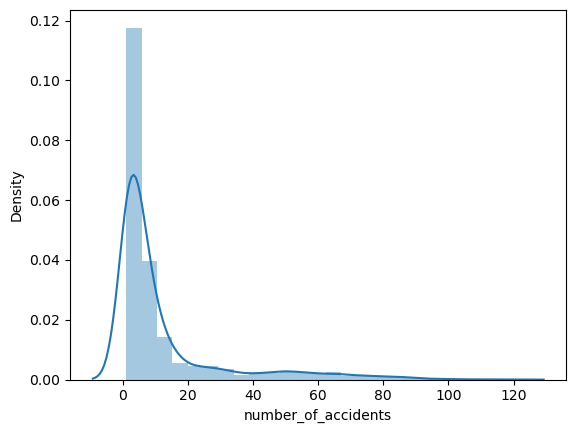

In [18]:
sns.distplot(accidents_grouped_coarse['number_of_accidents'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [19]:
# Rebuilding grouped dataframe with continuous features
group_cols_coarse = [
    'year', 'month', 'weekday',
    'accident_category', 'accident_scenario'
]

accidents_grouped_coarse = (
    df.groupby(group_cols_coarse)
      .agg(
          number_of_accidents=('object_id', 'size'),  # or just 'size' on index
          mean_distance_km=('distance_to_central_point_km', 'mean'),
          median_distance_km=('distance_to_central_point_km', 'median'),
          mean_location_density=('location_density_score', 'mean')
      )
      .reset_index()
)

In [20]:
# Grouping and merging the data frames
accidents_grouped_coarse = (
    df.groupby(group_cols_coarse)
      .size()
      .reset_index(name='number_of_accidents')
)

agg_cont = (
    df.groupby(group_cols_coarse)[['distance_to_central_point_km', 'location_density_score']]
      .mean()
      .reset_index()
      .rename(columns={
          'distance_to_central_point_km': 'mean_distance_km',
          'location_density_score': 'mean_location_density'
      })
)
accidents_grouped_coarse = accidents_grouped_coarse.merge(agg_cont, on=group_cols_coarse, how='left')

In [21]:
accidents_grouped_coarse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   4214 non-null   int64  
 1   month                  4214 non-null   int64  
 2   weekday                4214 non-null   int64  
 3   accident_category      4214 non-null   int64  
 4   accident_scenario      4214 non-null   object 
 5   number_of_accidents    4214 non-null   int64  
 6   mean_distance_km       4214 non-null   float64
 7   mean_location_density  4214 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 263.5+ KB


In [22]:
accidents_grouped_coarse.head()

,year,month,weekday,accident_category,accident_scenario,number_of_accidents,mean_distance_km,mean_location_density
0,2018,1,1,2,bike_only,1,3.175500,13.000000
1,2018,1,1,2,car_only,9,8.748595,4.444444
2,2018,1,1,2,ped_car,3,10.412133,9.000000
3,2018,1,1,3,bike_car,6,6.771687,6.333333
4,2018,1,1,3,bike_ped,1,6.648867,2.000000


## 3. Data Cleaning

Not required here, was done in an earlier step of the process

## 4. Data Preperation for Regression Analysis

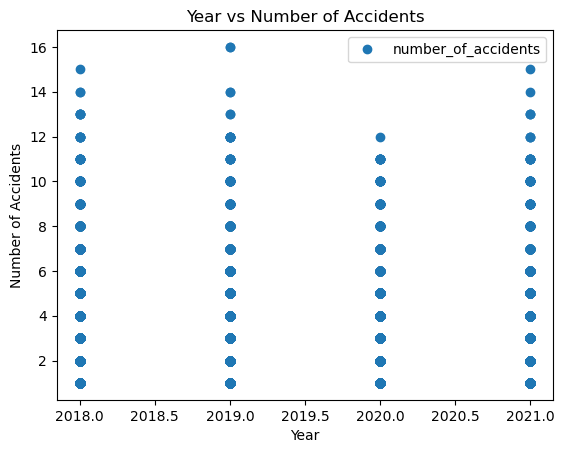

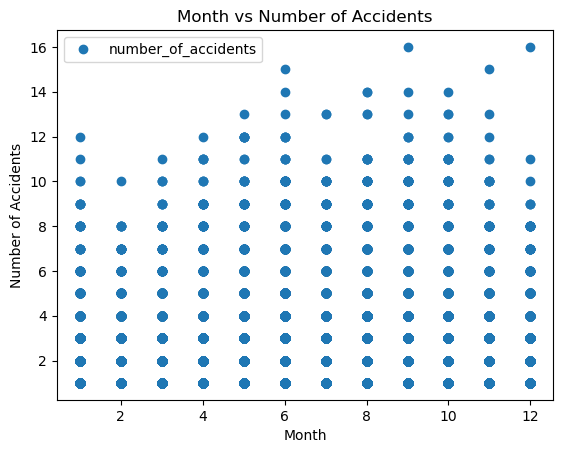

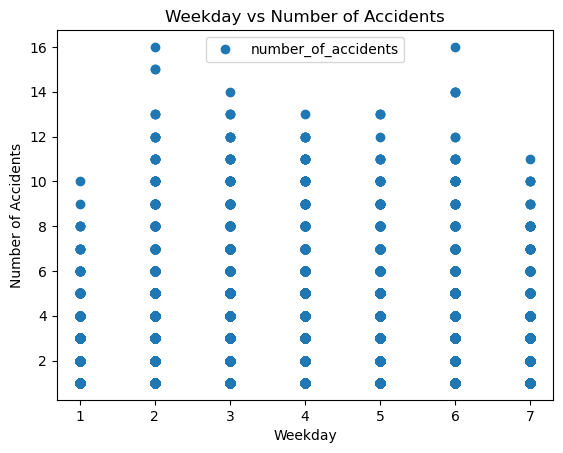

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

import matplotlib.pyplot as plt

# Year vs Number of Accidents
accidents_grouped.plot(x='year', y='number_of_accidents', style='o')
plt.title('Year vs Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# Month vs Number of Accidents
accidents_grouped.plot(x='month', y='number_of_accidents', style='o')
plt.title('Month vs Number of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Weekday vs Number of Accidents
accidents_grouped.plot(x='weekday', y='number_of_accidents', style='o')
plt.title('Weekday vs Number of Accidents')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.show()

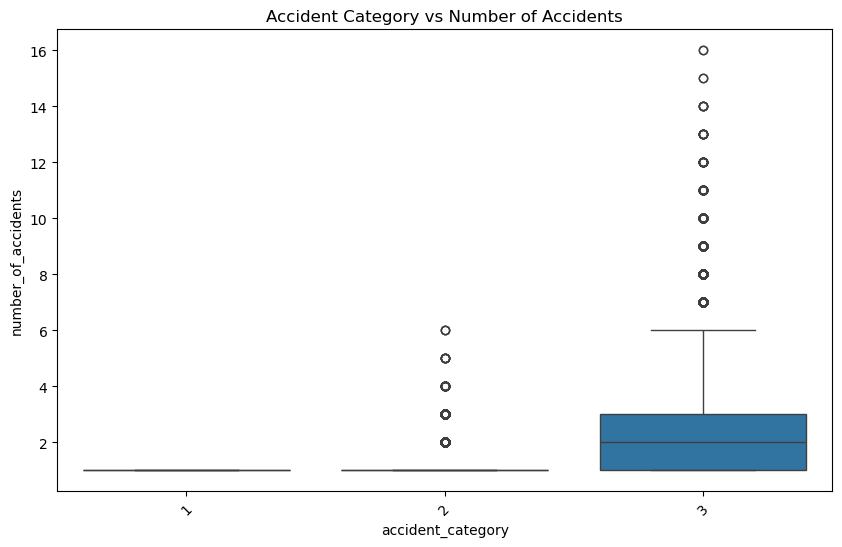

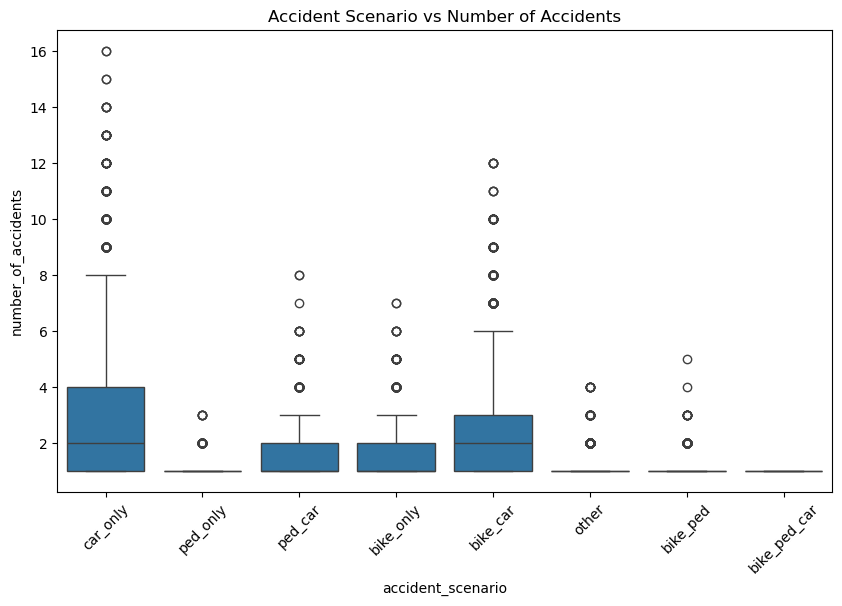

In [24]:
# Boxplots for categorical variables (accident category & scenario)
import seaborn as sns

# Accident Category vs Number of Accidents
plt.figure(figsize=(10, 6))
sns.boxplot(x='accident_category', y='number_of_accidents', data=accidents_grouped)
plt.title('Accident Category vs Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accident Scenario vs Number of Accidents
plt.figure(figsize=(10, 6))
sns.boxplot(x='accident_scenario', y='number_of_accidents', data=accidents_grouped)
plt.title('Accident Scenario vs Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### These variables seem not fruitful to test so I went back and added two other continuous variables to the dataframe

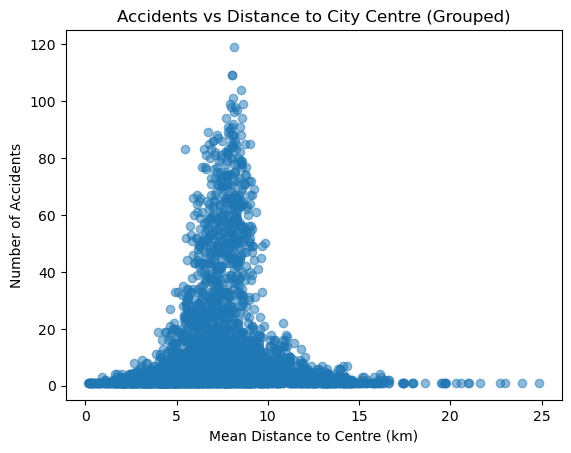

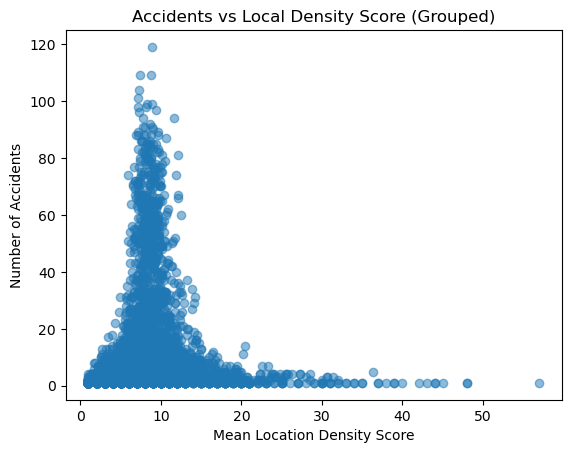

In [25]:
import matplotlib.pyplot as plt

# Scatter: mean distance vs number of accidents
plt.scatter(accidents_grouped_coarse['mean_distance_km'],
            accidents_grouped_coarse['number_of_accidents'], alpha=0.5)
plt.xlabel('Mean Distance to Centre (km)')
plt.ylabel('Number of Accidents')
plt.title('Accidents vs Distance to City Centre (Grouped)')
plt.show()

# Scatter: mean location density vs number of accidents
plt.scatter(accidents_grouped_coarse['mean_location_density'],
            accidents_grouped_coarse['number_of_accidents'], alpha=0.5)
plt.xlabel('Mean Location Density Score')
plt.ylabel('Number of Accidents')
plt.title('Accidents vs Local Density Score (Grouped)')
plt.show()

#### It seems to make most sense to do the regression analysis with accidents vs distance to centre

#### Hypothesis: Areas closer to the city centre have more accidents compared to areas farther away.

In [26]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = accidents_grouped_coarse['mean_distance_km'].values.reshape(-1,1)
y = accidents_grouped_coarse['number_of_accidents'].values.reshape(-1,1)

In [27]:
X

array([[ 3.17549986],
       [ 8.74859508],
       [10.41213321],
       ...,
       [ 2.56670452],
       [ 7.42554006],
       [ 7.38306597]], shape=(4214, 1))

In [28]:
y

array([[ 1],
       [ 9],
       [ 3],
       ...,
       [ 2],
       [14],
       [ 4]], shape=(4214, 1))

In [29]:
# Splitting data into a training set and a test set.

# Filter the dataframe by year for training and testing
train_df = accidents_grouped_coarse[(accidents_grouped_coarse['year'] >= 2018) &
                                    (accidents_grouped_coarse['year'] <= 2019)]

test_df = accidents_grouped_coarse[(accidents_grouped_coarse['year'] >= 2020) &
                                   (accidents_grouped_coarse['year'] <= 2021)]

# Define X and y for training and testing
X_train = train_df['mean_distance_km'].values.reshape(-1, 1)
y_train = train_df['number_of_accidents'].values.reshape(-1, 1)

X_test = test_df['mean_distance_km'].values.reshape(-1, 1)
y_test = test_df['number_of_accidents'].values.reshape(-1, 1)

## 5. Regression Analysis

#### Hypothesis: Areas closer to the city centre have more accidents compared to areas farther away.

In [30]:
# Creating a regression object.

regression = LinearRegression()

In [31]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

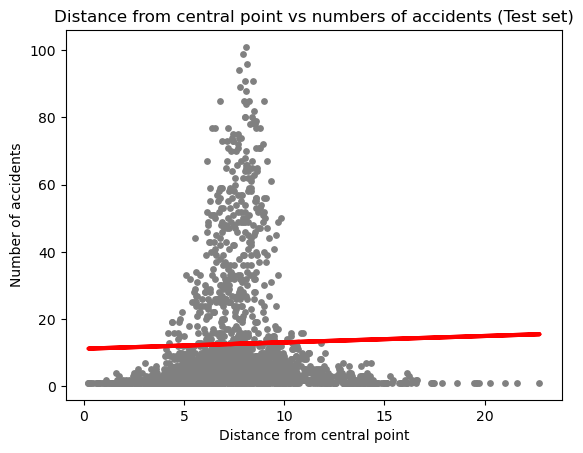

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from central point vs numbers of accidents (Test set)')
plot_test.xlabel('Distance from central point')
plot_test.ylabel('Number of accidents')
plot_test.show()

The scatter plot reveals that most accidents occur at distances between approximately 5 to 10 kilometres from the central point, forming a clustered peak. This suggests a non-linear relationship between distance and accident frequency:
Accidents are more common at intermediate distances and decrease both toward the centre and the outskirts.

The fitted linear regression line (in red) shows a slight positive slope, but it does not accurately reflect the peak in accident frequency. This indicates that a simple linear model is not suitable for this pattern — a non-linear approach might better capture the true relationship.

In [34]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [35]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18946856]]
Mean squared error:  292.0186319746299
R2 score:  -0.008611633968947485


In [36]:
y_predicted

array([[13.19788812],
       [12.92813156],
       [13.11223578],
       ...,
       [11.66430732],
       [12.58490389],
       [12.57685639]], shape=(2064, 1))

In [37]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,13.197888
1,1,12.928132
2,3,13.112236
3,2,12.566204
4,6,12.733678
5,2,11.387312
6,1,12.018933
7,29,12.553253
8,2,12.787001
9,5,12.095173


##### Comparing how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18946856]]
Mean squared error:  369.4620346399156
R2 score:  0.0007299048015804166


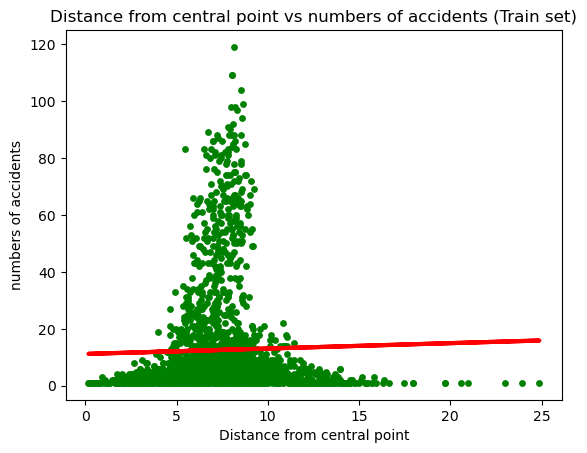

In [41]:
# Visualising the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from central point vs numbers of accidents (Train set)')
plot_test.xlabel('Distance from central point')
plot_test.ylabel('numbers of accidents')
plot_test.show()

### **How well does the line fit?**
Visually, the scatter shows a concentration of higher accident counts at intermediate distances (around 5-10 km from the central point) and fewer accidents both nearer and farther away. A straight line cannot model that “hump.” The fitted line is almost horizontal, indicating virtually no estimated linear trend between distance and accidents. Numerically, the slope is ~0.000067 (very close to zero). On the test set the R² (around 0.00009) is effectively zero, so the model performs no better than always predicting the mean accident count. The MSE (around 370) is large considering that many observed counts are in the single digits; large residuals occur where actual counts are high (e.g., 29, 31, 40, 57) but the model still predicts ~12. Conclusion: poor linear fit; distance alone, in linear form, is not a useful predictor.

### **Thoughts on data bias and structure**
- **Berlin has more than one centre:** Using distance from one point (e.g., Alexanderplatz) ignores the fact that Berlin is polycentric, so accidents cluster around several hubs, not just one.

- **Traffic exposure not included**: Places with more traffic will naturally have more accidents, but the data only uses distance, not traffic volume.

- **Averaging hides detail:** If data is grouped into areas, high‑risk spots inside them get averaged out.

- **Pandemic effects:** Travel patterns changed during 2020–2021, so accident patterns may differ from 2019.

- **Reporting differences:** Some boroughs may record accidents better than others.

- **Skewed data:** Many places have few accidents and a few places have lots, which makes linear regression less suitable.

## 6. Saving the Dataframe for further Use 

In [42]:
accidents_grouped_coarse.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'accidents_grouped_coarse.csv'))